In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [147]:
raw = pd.read_excel('raw_assy.xlsx', parse_dates=[6])
raw.head()

,ProcessType,GPN,JobNO,ItemNameType,StationID,SerialNumber,tDateTime,Spare,Result,failitem,Station,Button1_ClickRatio,Button2_ClickRatio,GPS_ (L1 + L5) by ref,ECG impedance short
0,Epix_Pro_ProdScan_Pack,010-02802-00,16036792,17812.0,1,3430501776,2022-10-06 05:59:54+00:00,142.0,True,0.0,T1_5PR1PS01,1.0,3.0,0.0,NaN
1,Epix_Pro_ProdScan_Pack,010-02802-00,16036792,17812.0,1,3430501683,2022-10-03 02:37:45+00:00,33.0,False,30.0,T1_5PR1PS01,0.0,0.0,0.0,NaN
2,Epix_Pro_ProdScan_Pack,010-02802-00,16036792,17812.0,1,3430501714,2022-09-30 09:17:49+00:00,1129.0,True,0.0,T1_5PR1PS01,1.0,3.0,0.0,NaN
3,Epix_Pro_ProdScan_Pack,010-02802-00,16036792,17812.0,7,3430501710,2022-09-30 08:38:12+00:00,242.0,True,0.0,T1_5PR1PS01,1.0,3.0,0.0,NaN
4,Epix_Pro_ProdScan_Pack,010-02802-00,16036792,17812.0,3,3430501682,2022-09-30 08:31:47+00:00,282.0,True,0.0,T1_5PR1PS01,1.0,3.0,0.0,NaN


ECG

In [148]:
ecg = raw[(raw.ItemNameType == 17820) & (raw.failitem.isin([0,285]))]

<AxesSubplot:xlabel='ECG impedance short', ylabel='Count'>

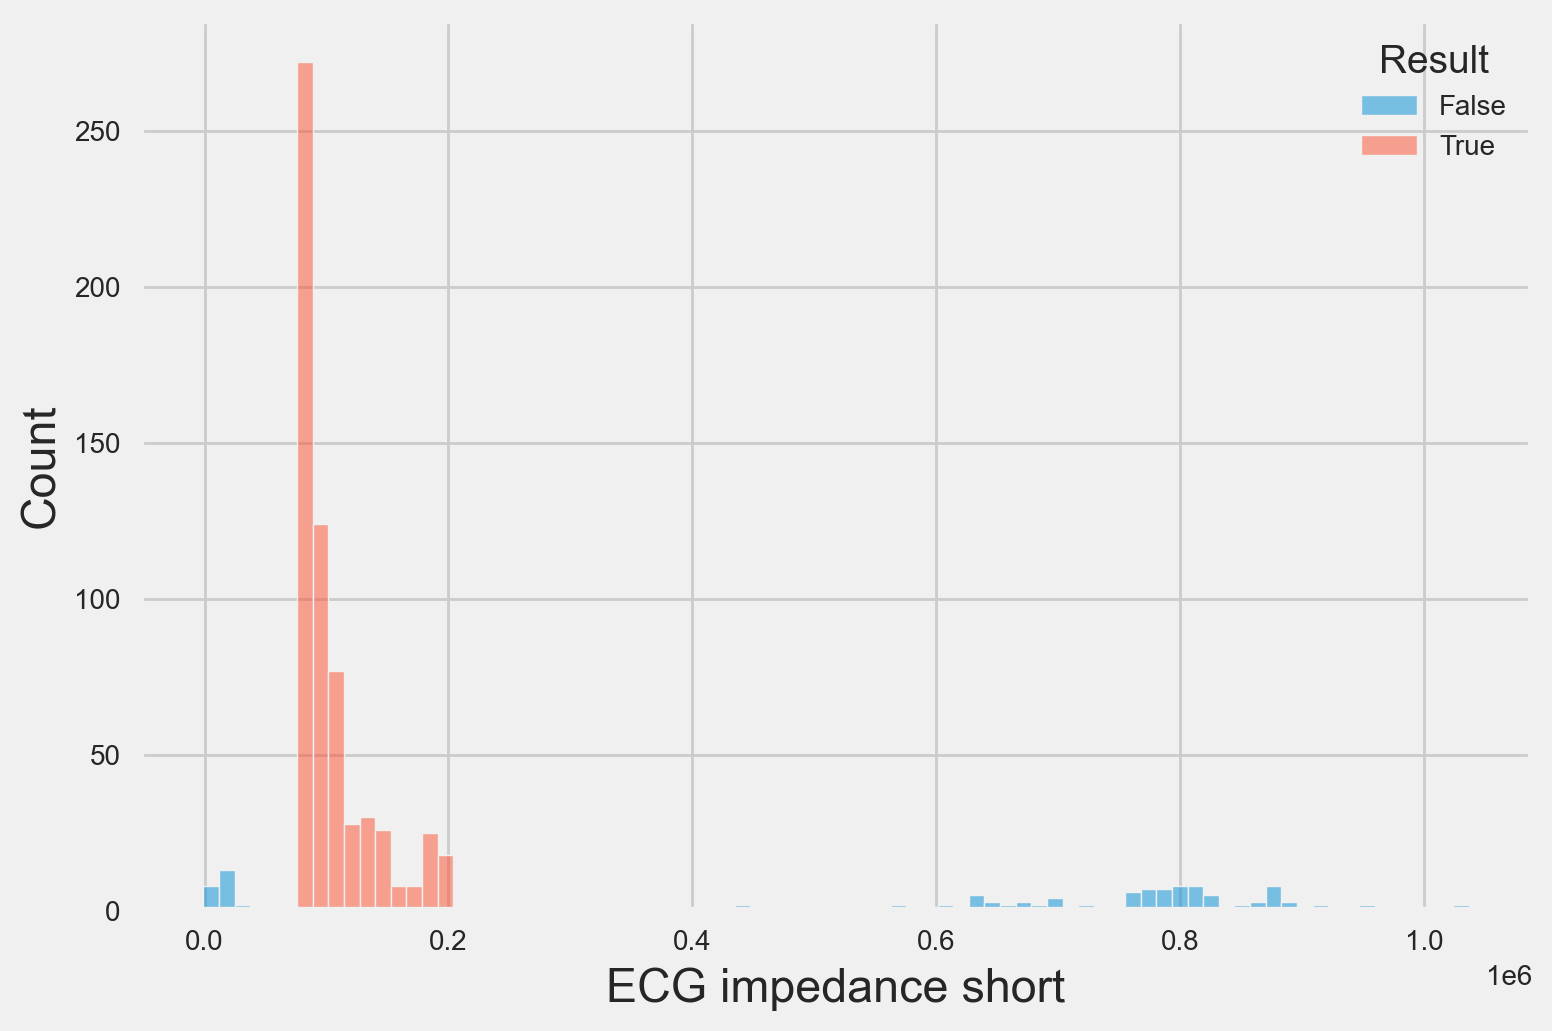

In [149]:
plt.figure(dpi=200)
sns.histplot(data=ecg, x='ECG impedance short', hue='Result')

CT-GPS L1L5

In [ ]:
gps = raw[(raw.ItemNameType == 17800) & (raw.failitem.isin([0,60]))]

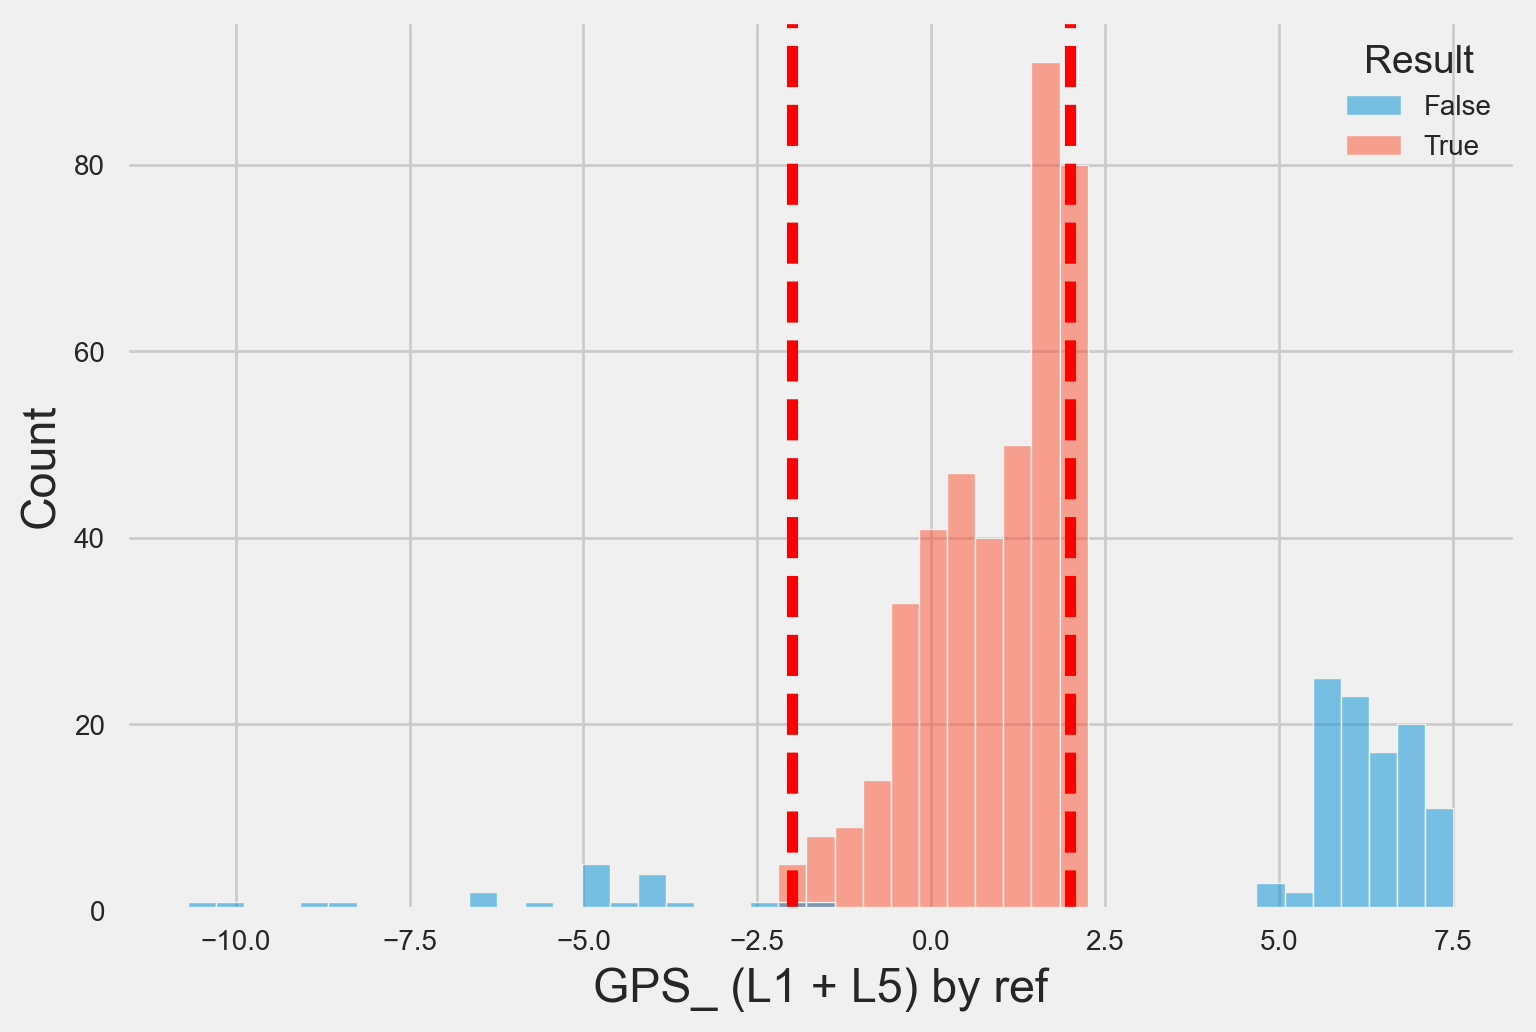

In [160]:
plt.figure(dpi=200)
sns.histplot(data=gps, x='GPS_ (L1 + L5) by ref', hue='Result')
plt.axvline(-2, color='red', ls='--')
plt.axvline(2, color='red', ls='--')

Click_ratio

In [152]:
click = raw[raw.ItemNameType==12434]

<AxesSubplot:xlabel='Button1_ClickRatio', ylabel='Count'>

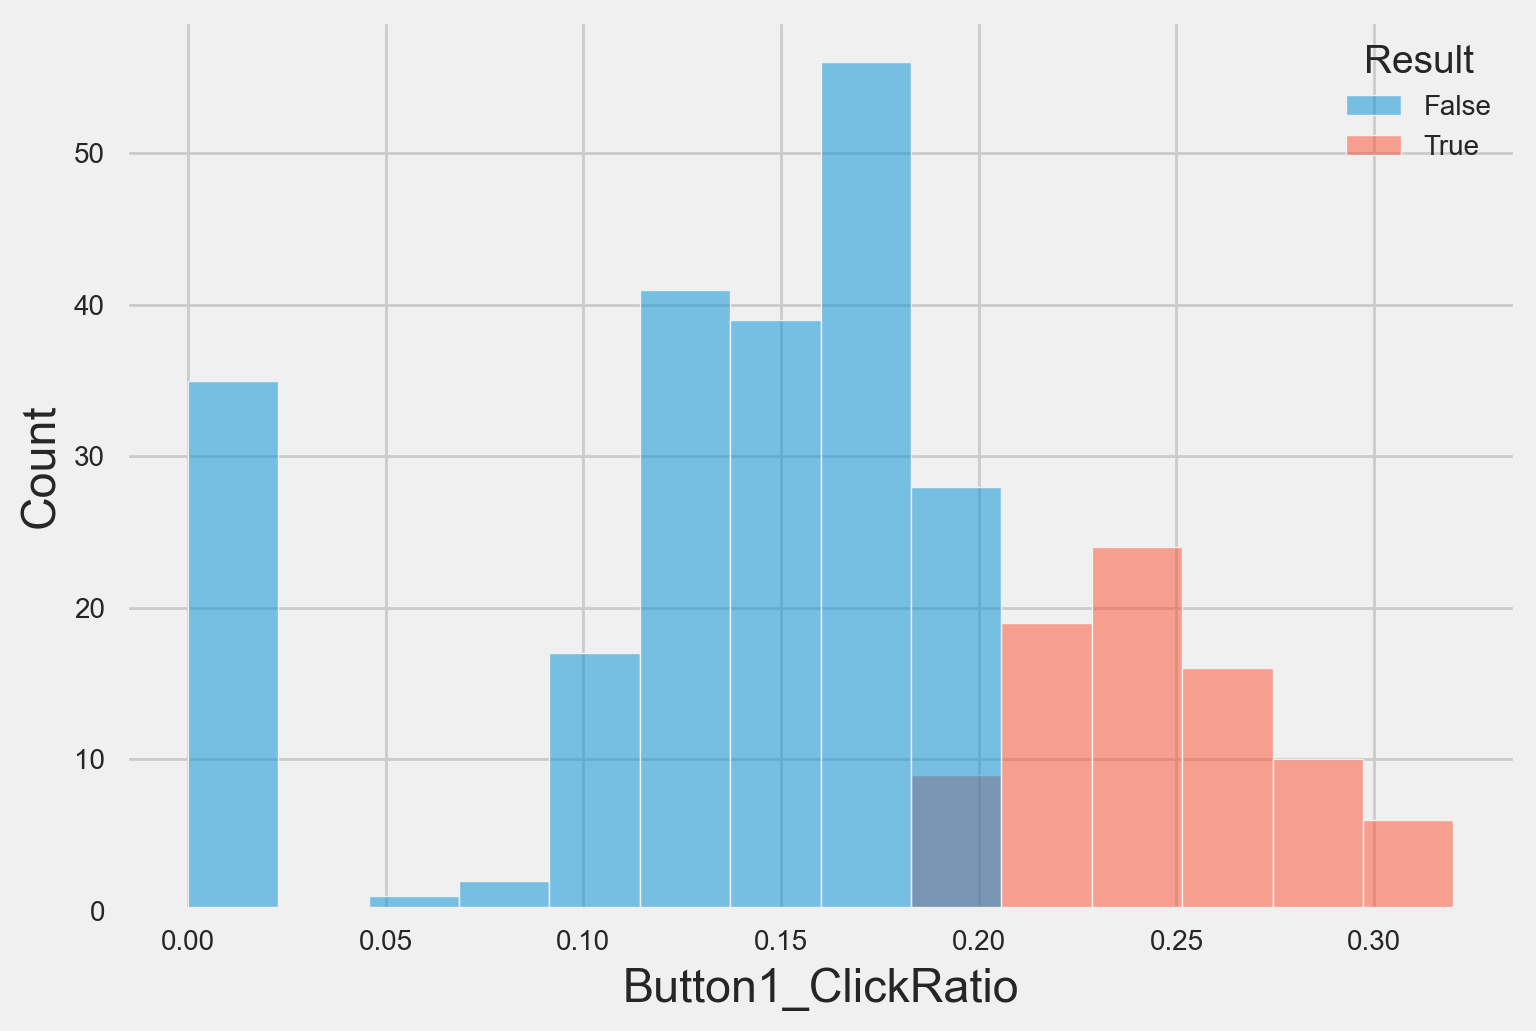

In [153]:
#Retry
btn1 = click[click.failitem.isin([0,7])]
plt.figure(dpi=200)
sns.histplot(data=btn1, x='Button1_ClickRatio', hue='Result')

<AxesSubplot:xlabel='Button1_ClickRatio', ylabel='Count'>

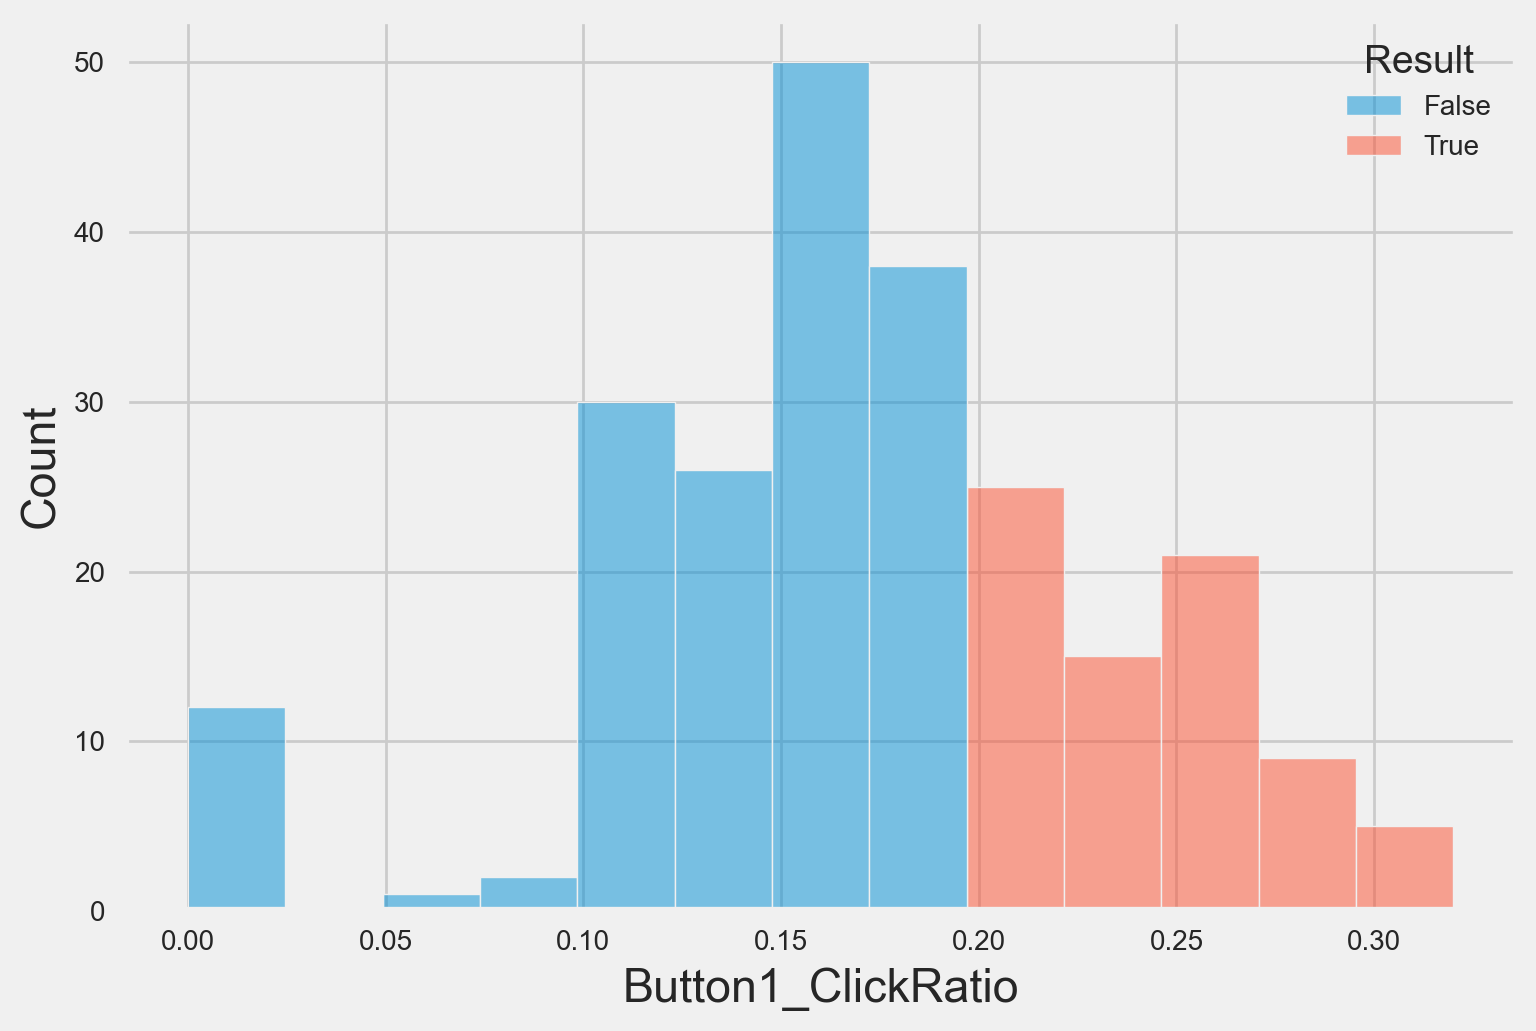

In [154]:
#Final Yield
plt.figure(dpi=200)
sns.histplot(data=btn1.sort_values(['tDateTime','SerialNumber'], ascending=True).drop_duplicates('SerialNumber',keep='last'), x='Button1_ClickRatio', hue='Result')

<AxesSubplot:xlabel='Button2_ClickRatio', ylabel='Count'>

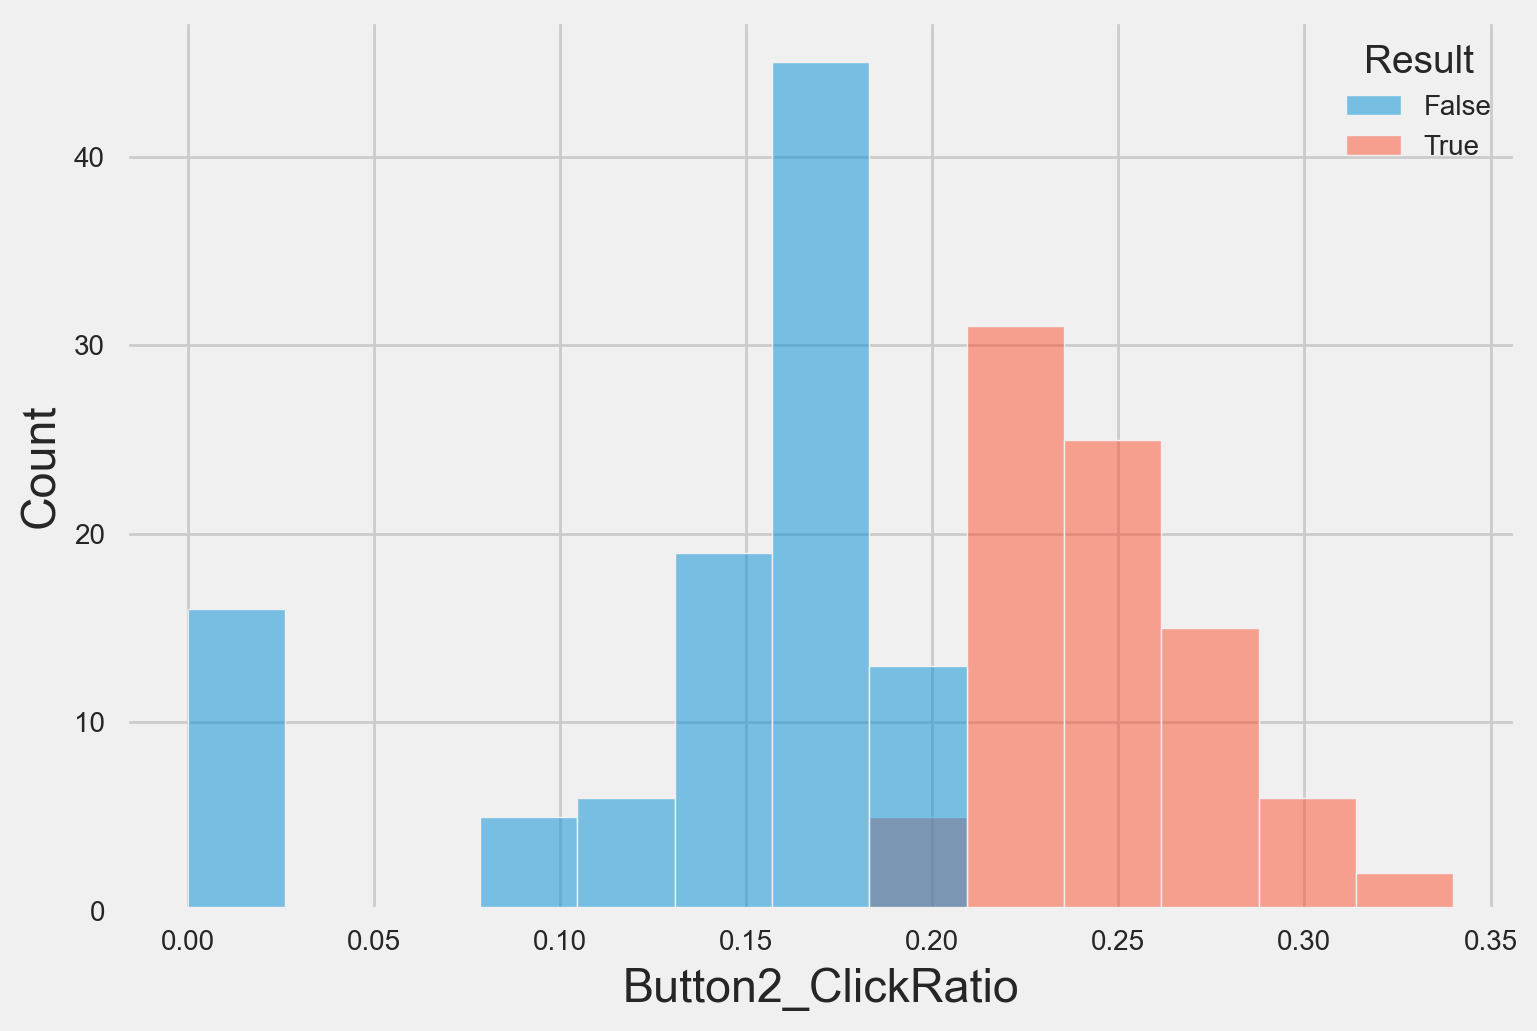

In [155]:
#Retry
btn2 = click[click.failitem.isin([0,17])]
plt.figure(dpi=200)
sns.histplot(data=btn2, x='Button2_ClickRatio', hue='Result')

<AxesSubplot:xlabel='Button2_ClickRatio', ylabel='Count'>

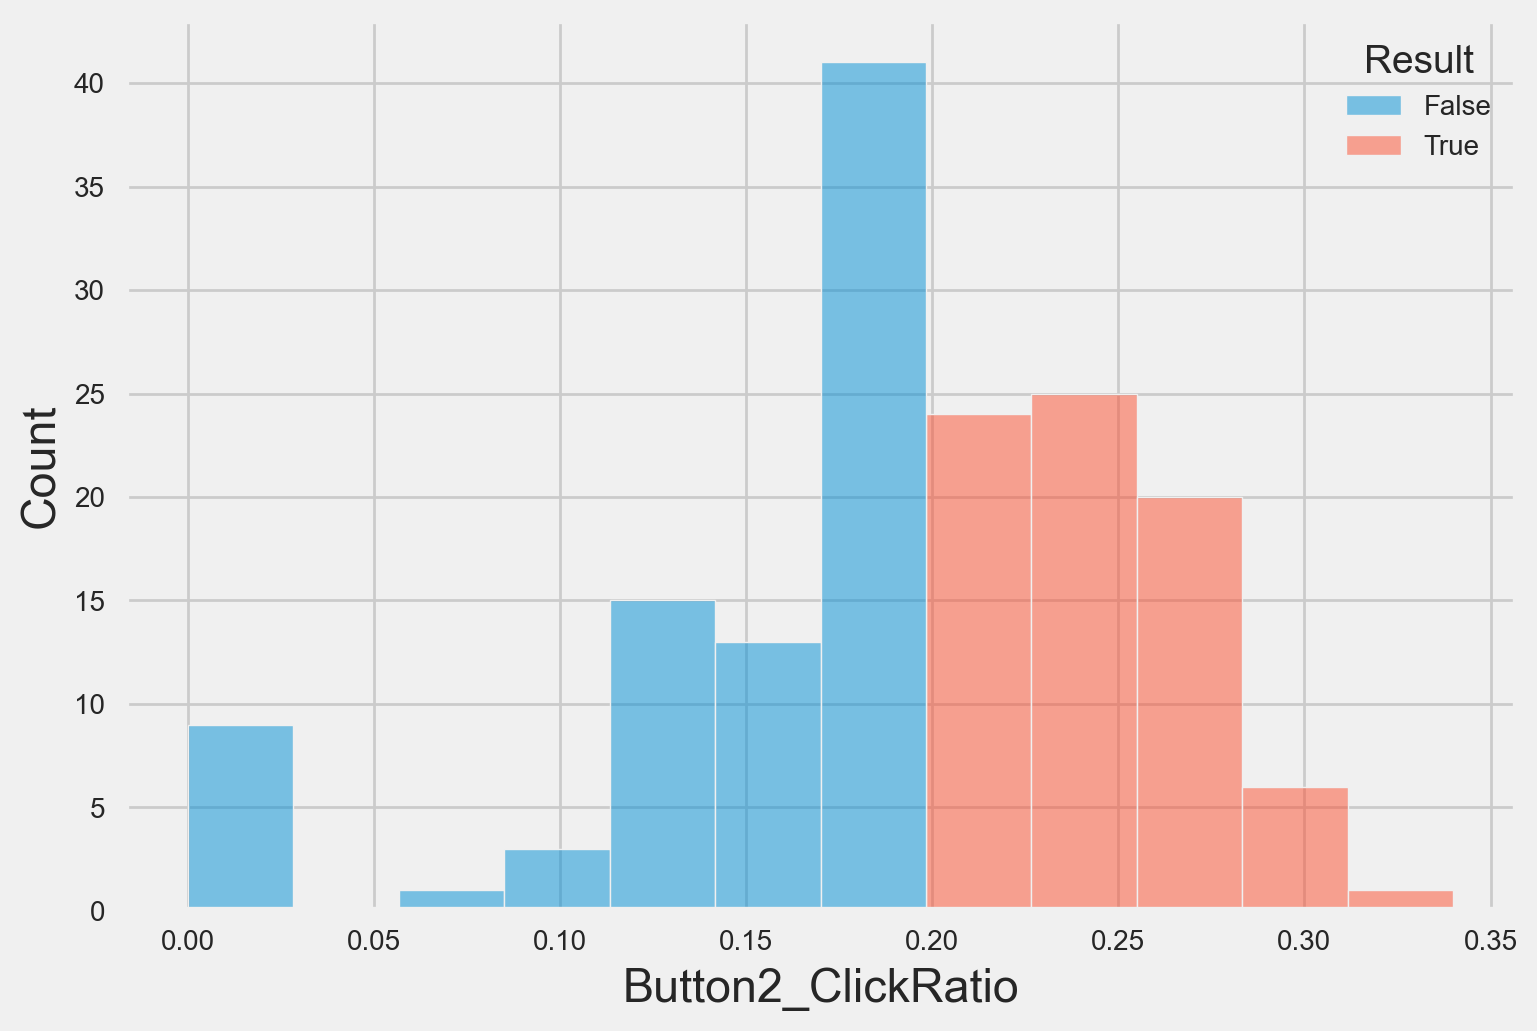

In [156]:
#Final Yield
plt.figure(dpi=200)
sns.histplot(data=btn2.sort_values(['tDateTime','SerialNumber'], ascending=True).drop_duplicates('SerialNumber',keep='last'), x='Button2_ClickRatio', hue='Result')

AFE Power Consumption data

In [ ]:
ate = pd.read_excel('raw_SMT.xlsx')

In [158]:
item88 = ate[ate.failitem.isin([0,88])]

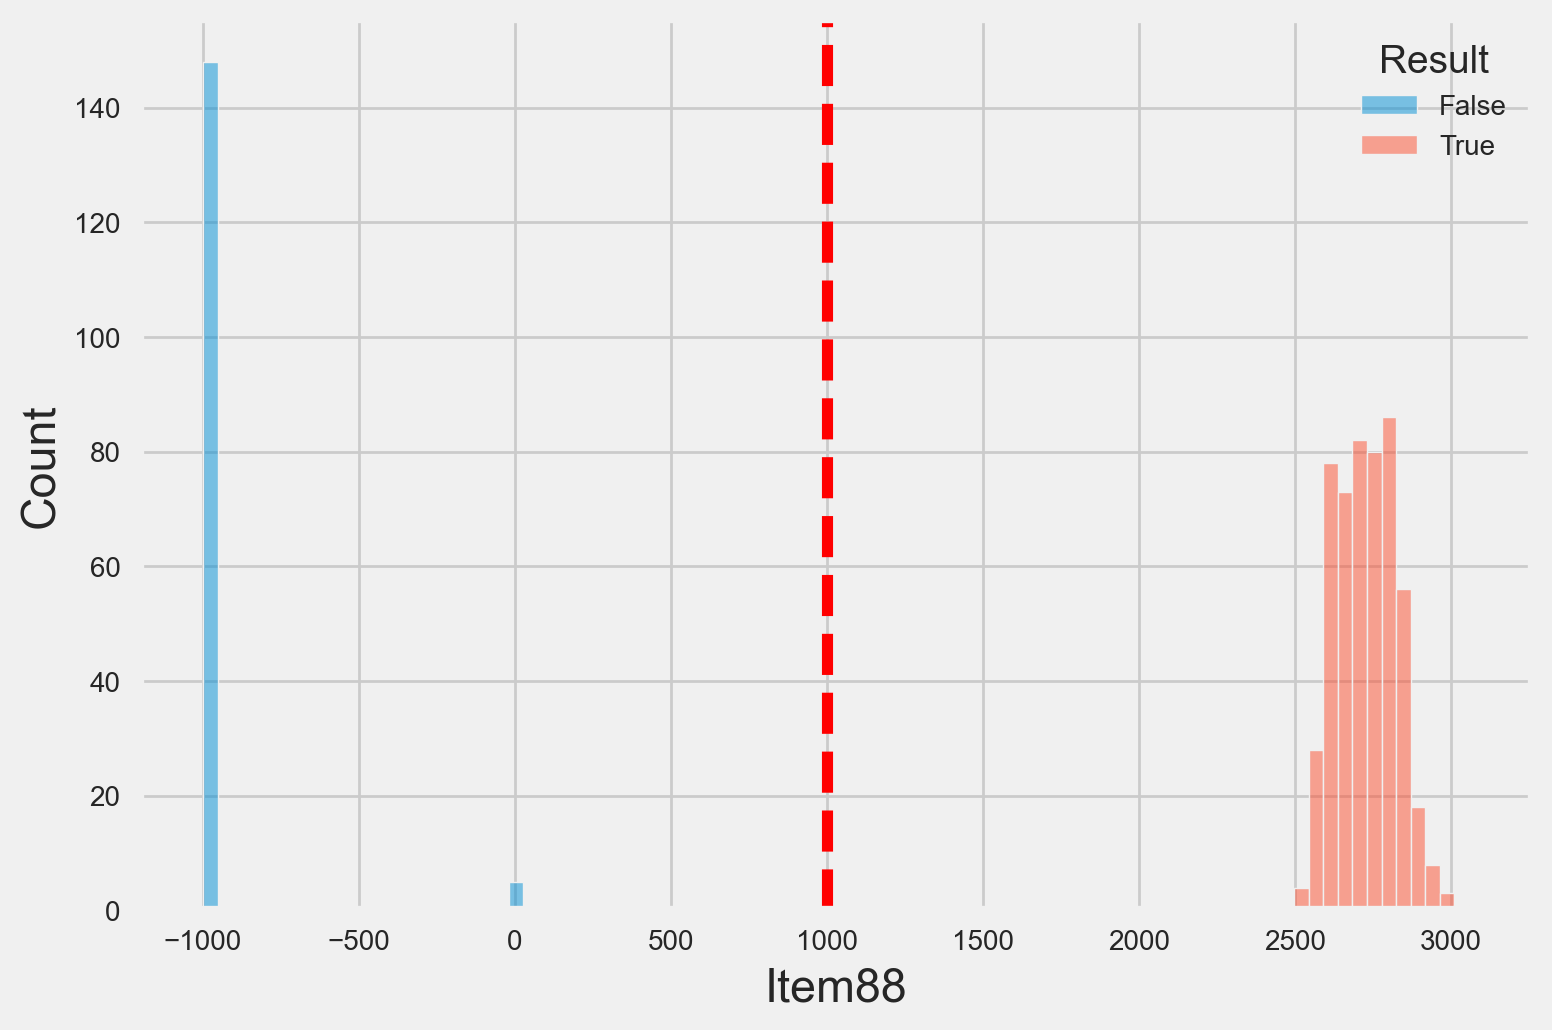

In [159]:
plt.figure(dpi=200)
sns.histplot(data=item88, x='Item88', hue='Result')
plt.axvline(1000, color='red', ls='--')